In [1]:
import ssl

ssl._create_default_https_context = ssl._create_stdlib_context

In [2]:
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy.util import add_cyclic

In [3]:
# Retrieve the data
ERA5 = xr.open_dataset(Path() / "data" / "era5-uv" / "data.nc")
ERA5 = ERA5.sel(valid_time="2024-04-02T12:00:00", pressure_level=500)

In [4]:
# Data manipulation to calculate the quanties
ERA5_KE = ERA5["u"] ** 2 + ERA5["v"] ** 2

In [5]:
# Prepare data for plotting
Lon, Lat = np.meshgrid(ERA5_KE["longitude"], ERA5_KE["latitude"])
Data = ERA5_KE.data
Data_p, Lon_p, Lat_p = add_cyclic(Data, x=Lon, y=Lat, precision=0.00001)

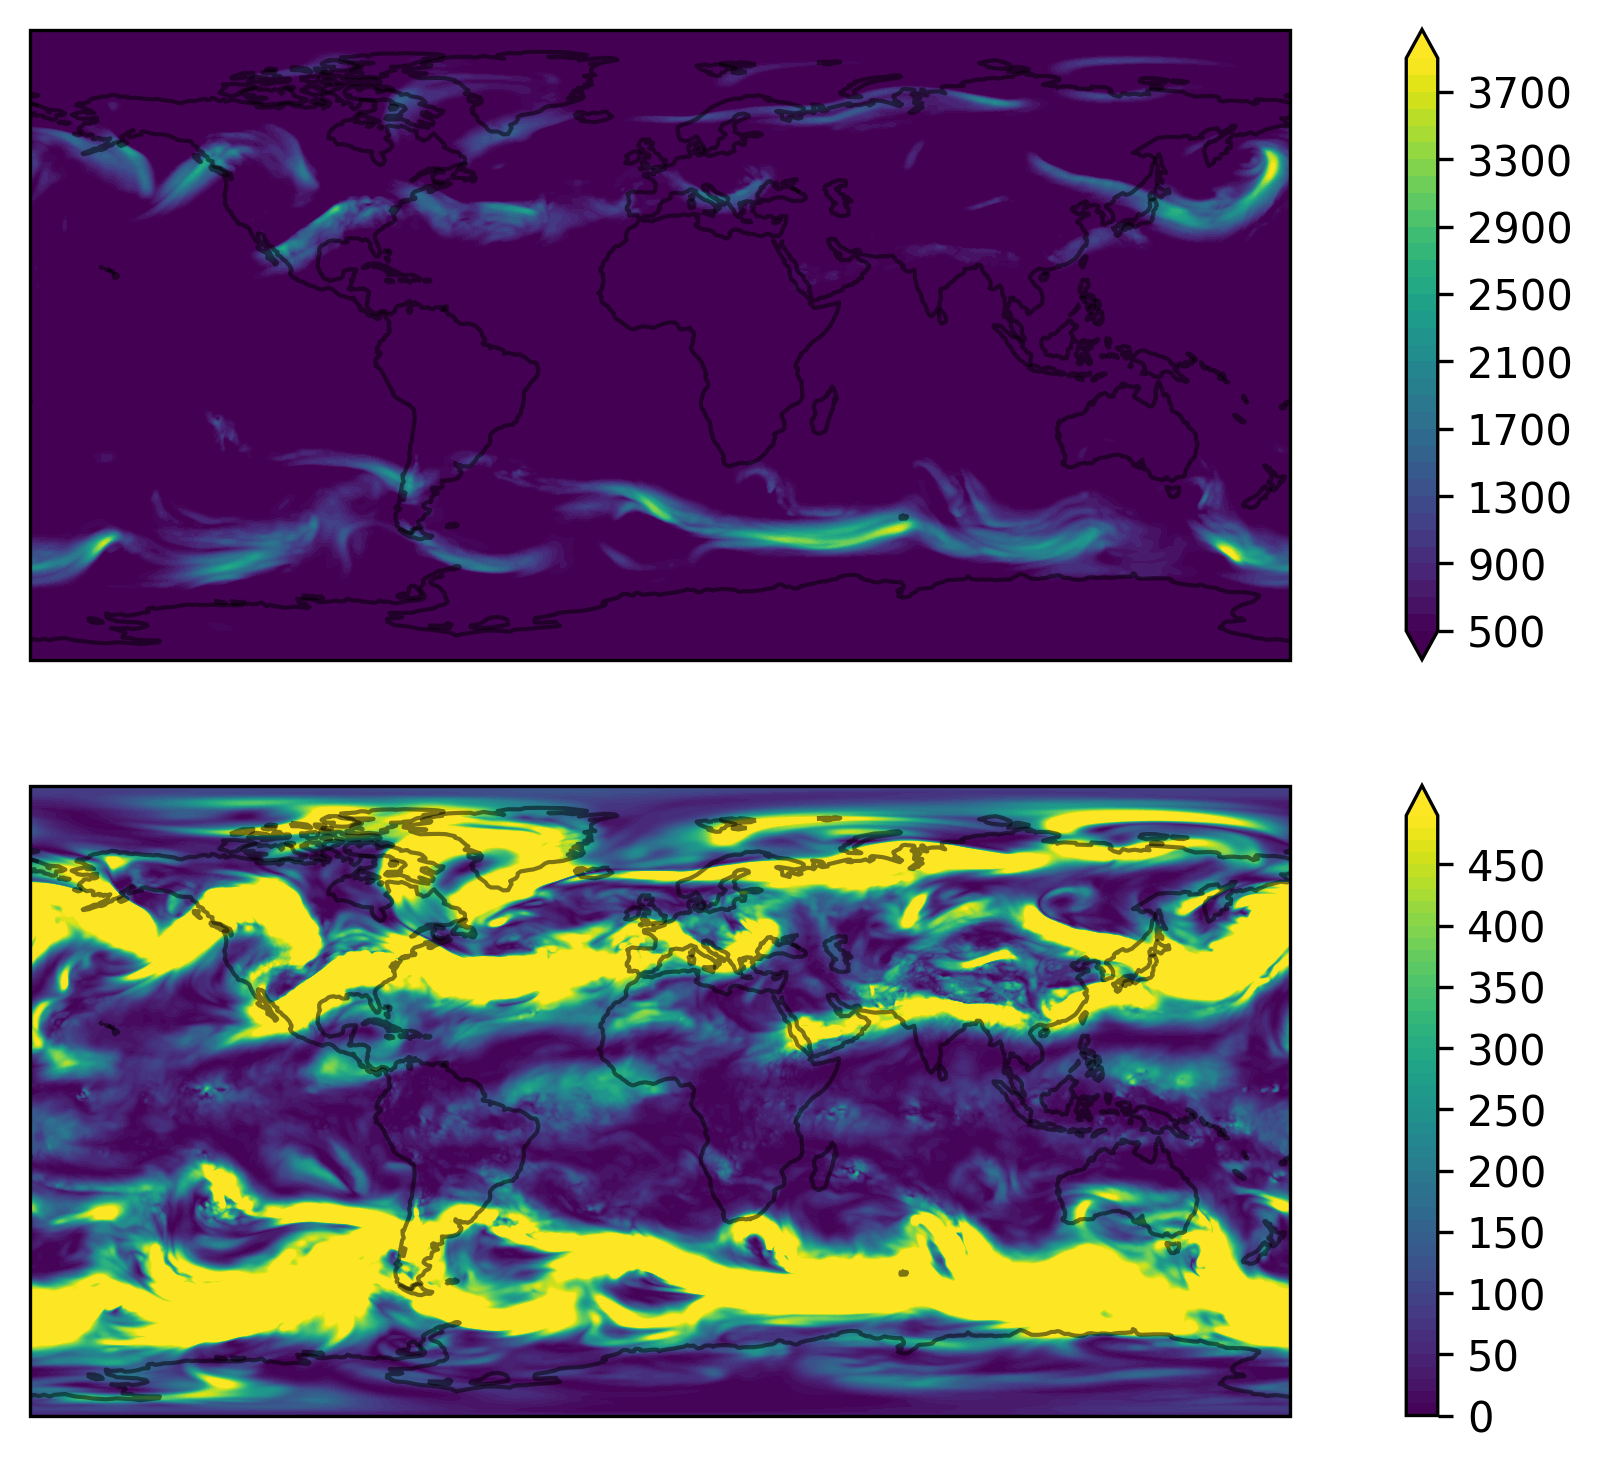

In [6]:
# Plotting
fig = plt.figure(figsize=(10, 6), dpi=300)
ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())

im1 = ax1.contourf(
    Lon_p,
    Lat_p,
    Data_p,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    extend="both",
    levels=np.arange(500, 4000, 100),
)

cb1 = plt.colorbar(im1, ax=ax1)
ax1.coastlines(alpha=0.5)

im2 = ax2.contourf(
    Lon_p,
    Lat_p,
    Data_p,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    extend="max",
    levels=np.arange(0, 500, 10),
)

cb2 = plt.colorbar(im2, ax=ax2)
ax2.coastlines(alpha=0.5)

plt.show()